# **Loan Default Prediction**

## **Problem Definition**

### **The Context:**

- Banks profit from home loan interests, which are then borrowed by their customers. In order to keep a steady flow of revenue, banks rely on loans being paid off. The largest issue banks face is the risk of default. Therefore, the approval process for loans must be effective and robust in order to minimize the risk of defaulters and financial loss of the bank.
-The Home Equity dataset (HMEQ) contains loan performance data on clients who have defaulted versus those who have not. With the current approval process, the bank has seen 20% of clients defaulting, resulting in a $20M loss.

### **The objective:**

- In order to minimize the bank's financial profit loss:
  - Build a classification model to predict clients who are likely to default on their loan and therefore reject their application
  - Provide recommendations to the bank on the important features to consider during the approval process  

### **The key questions:**

- What are the important features to consider when approving a loan?
- How likely is an applicant to default? What type of applicant?
- What are the main drivers of a default?

### **The problem formulation**:

- Using EDA, we will understand the important indicators of default adverse clients. Using a machine leanrning model, we will minimize the likelihood of falsely approving these high risk clients, while ensuring it is interpretable enough to provide reasoning for their rejection.

## **Data Description:**
The Home Equity dataset (HMEQ) contains baseline and loan performance information for 5,960 recent home equity loans. The target (BAD) is a binary variable that indicates whether an applicant has ultimately defaulted or has been severely delinquent. This adverse outcome occurred in 1,189 cases (20 percent). 12 input variables were registered for each applicant.


* **BAD:** 1 = Client defaulted on loan, 0 = loan repaid

* **LOAN:** Amount of loan approved.

* **MORTDUE:** Amount due on the existing mortgage.

* **VALUE:** Current value of the property.

* **REASON:** Reason for the loan request. (HomeImp = home improvement, DebtCon= debt consolidation which means taking out a new loan to pay off other liabilities and consumer debts)

* **JOB:** The type of job that loan applicant has such as manager, self, etc.

* **YOJ:** Years at present job.

* **DEROG:** Number of major derogatory reports (which indicates a serious delinquency or late payments).

* **DELINQ:** Number of delinquent credit lines (a line of credit becomes delinquent when a borrower does not make the minimum required payments 30 to 60 days past the day on which the payments were due).

* **CLAGE:** Age of the oldest credit line in months.

* **NINQ:** Number of recent credit inquiries.

* **CLNO:** Number of existing credit lines.

* **DEBTINC:** Debt-to-income ratio (all your monthly debt payments divided by your gross monthly income. This number is one way lenders measure your ability to manage the monthly payments to repay the money you plan to borrow.

## **Import the necessary libraries and Data**

In [ ]:
# To ignore warnings
import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# Setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get different metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    classification_report,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

In [ ]:
#Load data set
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Data Overview**

- Reading the dataset
- Understanding the shape of the dataset
- Checking the data types
- Checking for missing values
- Checking for duplicated values

In [ ]:
#Read the csv file
hmeq = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Week 5: Practical Data Science/capstone project/hmeq.csv')

In [ ]:
# copying data to another variable to avoid any changes to original data
data = hmeq.copy()

In [ ]:
data.head() #view top 5 rows of the data

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.00000,39025.00000,HomeImp,Other,10.50000,0.00000,0.00000,94.36667,1.00000,9.00000,NaN
1,1,1300,70053.00000,68400.00000,HomeImp,Other,7.00000,0.00000,2.00000,121.83333,0.00000,14.00000,NaN
2,1,1500,13500.00000,16700.00000,HomeImp,Other,4.00000,0.00000,0.00000,149.46667,1.00000,10.00000,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.00000,112000.00000,HomeImp,Office,3.00000,0.00000,0.00000,93.33333,0.00000,14.00000,NaN


In [ ]:
data.shape #understand the shape of the data

(5960, 13)

In [ ]:
data.dtypes #understand the data type of variables

BAD          int64
LOAN         int64
MORTDUE    float64
VALUE      float64
REASON      object
JOB         object
YOJ        float64
DEROG      float64
DELINQ     float64
CLAGE      float64
NINQ       float64
CLNO       float64
DEBTINC    float64
dtype: object

In [ ]:
data.duplicated().sum() #check for duplicated rows

0

In [ ]:
data.isnull().sum()/5960*100 #check % of missing values in each column by dividing the amount of rows

BAD        0.00000
LOAN       0.00000
MORTDUE    8.69128
VALUE      1.87919
REASON     4.22819
JOB        4.68121
YOJ        8.64094
DEROG     11.87919
DELINQ     9.73154
CLAGE      5.16779
NINQ       8.55705
CLNO       3.72483
DEBTINC   21.25839
dtype: float64

**Observations**

*   Data set has **5960 observations of home equity loans with 13 columns** (12 columns representing customer information and 1 column depicting whether a person has defaulted or not - target outcome)
*   There are **no duplicated rows** in the data
*   The data has 10 numerical columns and 2 categorical columns
*   There **are missing values** in the data, represented by NaN in every column except than Loan and BAD target. Most variables are **missing less than 10% of values**, meanwhile **Derog and DebtInc are missing 12% and 21% respectively.**




## Summary Statistics

In [ ]:
#Show statistical summary of data set
data.describe().T

,count,mean,std,min,25%,50%,75%,max
BAD,5960.00000,0.19950,0.39966,0.00000,0.00000,0.00000,0.00000,1.00000
LOAN,5960.00000,18607.96980,11207.48042,1100.00000,11100.00000,16300.00000,23300.00000,89900.00000
MORTDUE,5442.00000,73760.81720,44457.60946,2063.00000,46276.00000,65019.00000,91488.00000,399550.00000
VALUE,5848.00000,101776.04874,57385.77533,8000.00000,66075.50000,89235.50000,119824.25000,855909.00000
YOJ,5445.00000,8.92227,7.57398,0.00000,3.00000,7.00000,13.00000,41.00000
DEROG,5252.00000,0.25457,0.84605,0.00000,0.00000,0.00000,0.00000,10.00000
DELINQ,5380.00000,0.44944,1.12727,0.00000,0.00000,0.00000,0.00000,15.00000
CLAGE,5652.00000,179.76628,85.81009,0.00000,115.11670,173.46667,231.56228,1168.23356
NINQ,5450.00000,1.18606,1.72867,0.00000,0.00000,1.00000,2.00000,17.00000
CLNO,5738.00000,21.29610,10.13893,0.00000,15.00000,20.00000,26.00000,71.00000


**Observations** from Summary Statistics

*   20% of applicants defaulted
*   No missing values under Loan information
*   On average, loans of $$18,600 get approved, although they range as low as $1,100 to as high as $90,000
*   At least 50% of applicants are in their current jobs for 7 years
*   75% of applicants do not have any derogatoy reports or deliquent credit lines
*   The average age of most credit lines is 180 months (15 years)
* The Debt-to-income ratio is 34% on average, which is a good indicator of a healthy ability to repay loans. However, the maximum DEBTINC value is 203% which shows extreme likelihood of default.


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


In [ ]:
data.nunique()

BAD           2
LOAN        540
MORTDUE    5053
VALUE      5381
REASON        2
JOB           6
YOJ          99
DEROG        11
DELINQ       14
CLAGE      5314
NINQ         16
CLNO         62
DEBTINC    4693
dtype: int64

In [ ]:
#define target variable from dependent variables
category = data.select_dtypes(['object'])

for column in category: #Printing number of count of each unique value in each column
    print(data[column].value_counts())
    print("-" * 30)

DebtCon    3928
HomeImp    1780
Name: REASON, dtype: int64
------------------------------
Other      2388
ProfExe    1276
Office      948
Mgr         767
Self        193
Sales       109
Name: JOB, dtype: int64
------------------------------


In [ ]:
#creating numerical columns
num_cols = ['BAD','LOAN','MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ',
            'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']
data[num_cols].dtypes

BAD          int64
LOAN         int64
MORTDUE    float64
VALUE      float64
YOJ        float64
DEROG      float64
DELINQ     float64
CLAGE      float64
NINQ       float64
CLNO       float64
DEBTINC    float64
dtype: object

In [ ]:
data['BAD'].value_counts(normalize = True) #Understand the target variable distribution

0   0.80050
1   0.19950
Name: BAD, dtype: float64

Our target variable is skewed towards BAD=1 class
*   **Class 0 represents 80%** of the population that did not default.
*   **Class 1 represents 20%** of the population who defaulted.

In [ ]:
#Compute how much money the bank loaned to the defaulters
defaulters = data[data['BAD']==1] #create variable for those who defaulted on loan
loan_defaulters = defaulters['LOAN'].sum() #sum the loan amount

print('The total loan amount to those who defaulted is: ${:.2f}'.format(loan_defaulters))

average_loan_defaulters = defaulters['LOAN'].mean() #average the loan amount
print('The average loan amount for those who defaulted is: ${:.2f}'.format(average_loan_defaulters))


The total loan amount to those who defaulted is: $20120400.00
The average loan amount for those who defaulted is: $16922.12


In [ ]:
#Compute how much money the bank loaned to the non defaulters
non_default = data[data['BAD']==0]
loan_non_default = non_default['LOAN'].sum() #sum the loan amount
print('The total loan amount for those who did not default is: ${:.2f}'.format(loan_non_default))

average_non_default = non_default['LOAN'].mean() #average the loan amount
print('The average loan amount for those who did not default is: ${:.2f}'.format(average_non_default))

The total loan amount for those who did not default is: $90783100.00
The average loan amount for those who did not default is: $19028.11


In [ ]:
data['LOAN'].sum() #sum the total amount loaned from data set

110903500

**Observations**


*   The majority of applicants (66%) request loans to **pay off debts** (DebtCon)
*   There are **6 unique job** categories, **40%** of applicants fall under the '**Other**'. This initial observation makes me wonder if the JOB category is important in this predictive model. Will perfrom an EDA to further understand its distribution and whether or not it has any relationship to the target variable BAD.
* There are no unique variables in the data set and therefore there is no need to drop any column at this time.
* The average amount loaned to the defaulters versus the non defaulters is only $2k less


## **Exploratory Data Analysis (EDA) and Visualization**

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. What is the range of values for the loan amount variable "LOAN"?
2. How does the distribution of years at present job "YOJ" vary across the dataset?
3. How many unique categories are there in the REASON variable?
4. What is the most common category in the JOB variable?
5. Is there a relationship between the REASON variable and the proportion of applicants who defaulted on their loan?
6. Do applicants who default have a significantly different loan amount compared to those who repay their loan?
7. Is there a correlation between the value of the property and the loan default rate?
8. Do applicants who default have a significantly different mortgage amount compared to those who repay their loan?

### **Univariate Analysis**


In [ ]:
data[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
BAD,5960.00000,0.19950,0.39966,0.00000,0.00000,0.00000,0.00000,1.00000
LOAN,5960.00000,18607.96980,11207.48042,1100.00000,11100.00000,16300.00000,23300.00000,89900.00000
MORTDUE,5442.00000,73760.81720,44457.60946,2063.00000,46276.00000,65019.00000,91488.00000,399550.00000
VALUE,5848.00000,101776.04874,57385.77533,8000.00000,66075.50000,89235.50000,119824.25000,855909.00000
YOJ,5445.00000,8.92227,7.57398,0.00000,3.00000,7.00000,13.00000,41.00000
DEROG,5252.00000,0.25457,0.84605,0.00000,0.00000,0.00000,0.00000,10.00000
DELINQ,5380.00000,0.44944,1.12727,0.00000,0.00000,0.00000,0.00000,15.00000
CLAGE,5652.00000,179.76628,85.81009,0.00000,115.11670,173.46667,231.56228,1168.23356
NINQ,5450.00000,1.18606,1.72867,0.00000,0.00000,1.00000,2.00000,17.00000
CLNO,5738.00000,21.29610,10.13893,0.00000,15.00000,20.00000,26.00000,71.00000


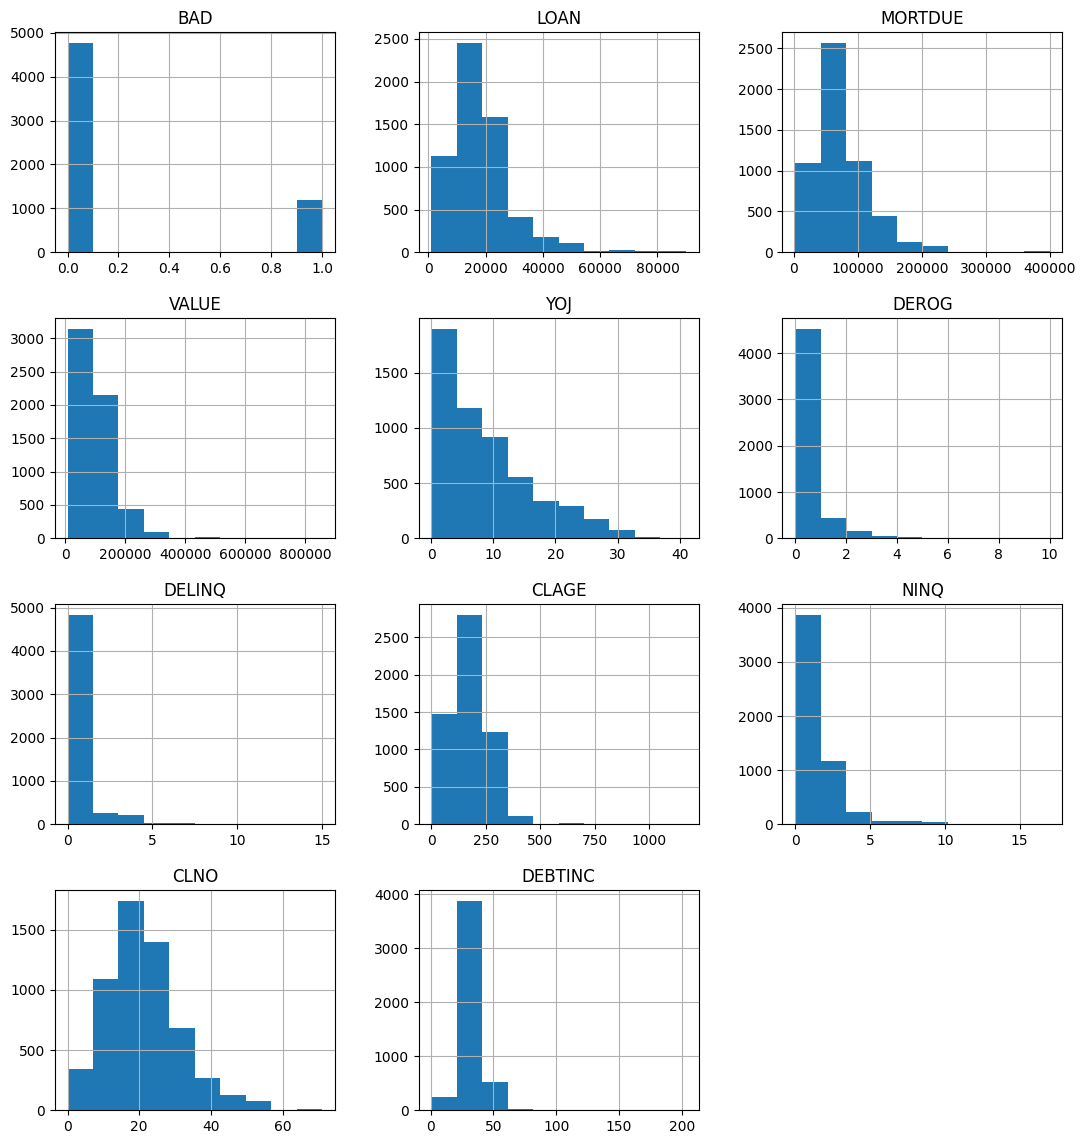

In [ ]:
# Creating histograms for numerical columns
data[num_cols].hist(figsize = (13, 14))

plt.show()

In [ ]:
# Printing the % sub categories of each category
for i in category:

    print(data[i].value_counts(normalize = True))

    print('*' * 30)

DebtCon   0.68816
HomeImp   0.31184
Name: REASON, dtype: float64
******************************
Other     0.42035
ProfExe   0.22461
Office    0.16687
Mgr       0.13501
Self      0.03397
Sales     0.01919
Name: JOB, dtype: float64
******************************


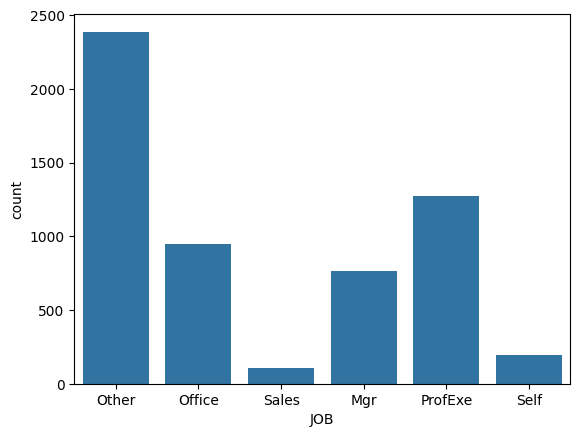

In [ ]:
sns.countplot(data=data, x= "JOB")
plt.show()

**Observations**
*  Approved Loans range from $$1,100 - $90,000.
* The most common JOB falls under Other
*  The YOJ variable has a left skewed distribution, as most people on average stay at a job for less than 10 years.
*  There are only 2 unique categories for the Reason variable: Home Improvemnts and Paying off Debt
* CLNO and DEBTINC have normal distributions as their mean and medians are close

<Axes: xlabel='DELINQ', ylabel='CLNO'>

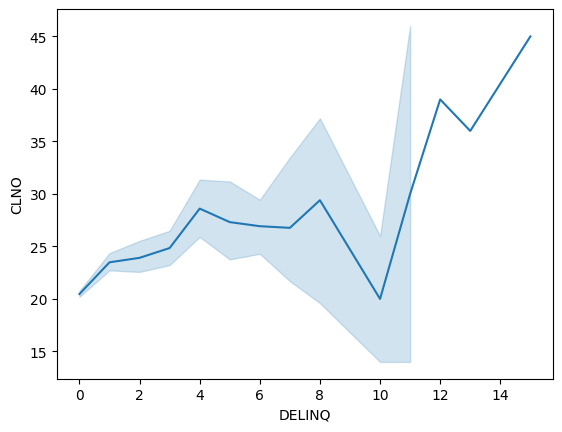

In [ ]:
sns.lineplot(data=data, x='DELINQ',y='CLNO')

**Observation:** CLNO and DELINQ have a slight correlation - The more credit lines an applicant has, the more likely they are to have delinquent credit lines. However, there are outliers.

### **Bivariate Analysis**

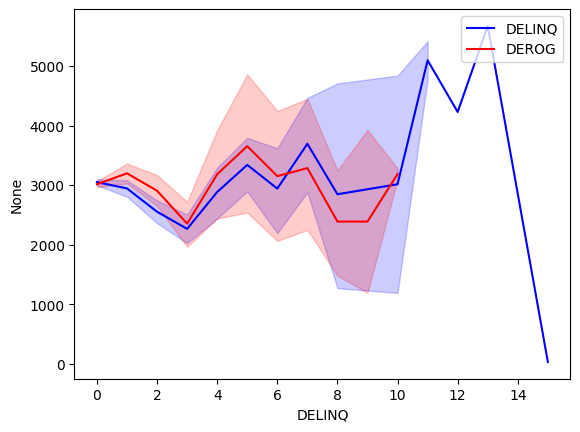

In [ ]:
#Plot DEROG AND DELINQ in line graph
sns.lineplot(y=data.index, x='DELINQ', data=data, color='blue', label='DELINQ')
sns.lineplot(y=data.index, x='DEROG', data=data, color='red', label='DEROG')

# Adding legend
plt.legend(loc='upper right')

**Observations**: The DEROG and DELINQ variables have similar trend in which shows an applicant is likely to have many delinquent credit lines, if they have many derogatory reports.

<Axes: xlabel='VALUE', ylabel='MORTDUE'>

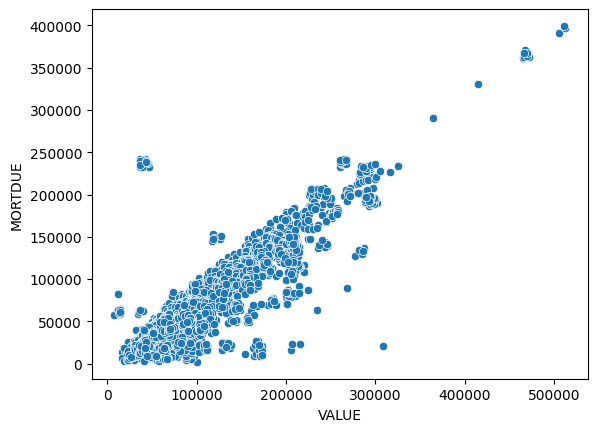

In [ ]:
#plot correlation of VALUE and MORTDUE
sns.scatterplot(x=data['VALUE'],y=data['MORTDUE'],palette="PuBu")

**Observations**: VALUE is positively correlated to MORTDUE. The larger the current value of a property is, the more an exisiting mortgage is.

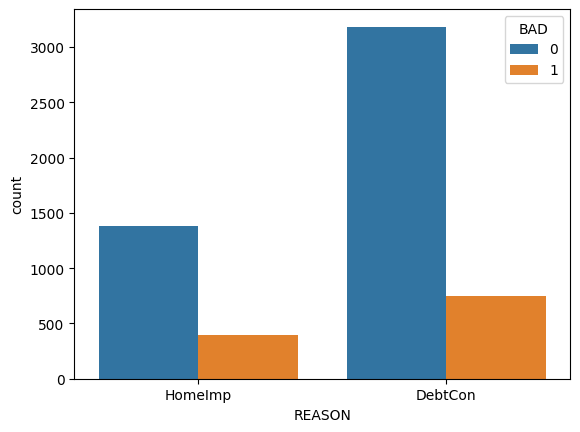

<Figure size 1000x600 with 0 Axes>

In [ ]:
#Plot REASON in comparison to default status
sns.countplot(x = 'REASON', hue = 'BAD', data=data)
plt.figure(figsize = (10, 6))
plt.show()

**Observations**: Most applicants use loans to pay debt and therefore there is a higher percentage of loaners that default.  However, the difference isnt

In [ ]:
#provide summary statistics comparing each class
data.groupby(["BAD"])["MORTDUE",'VALUE'].describe()

MORTDUE                                                             \
         count        mean         std        min         25%         50%   
BAD                                                                         
0   4359.00000 74829.24905 43584.99359 2619.00000 47484.00000 66839.00000   
1   1083.00000 69460.45297 47588.19447 2063.00000 39946.50000 60279.00000   

                                  VALUE                                      \
            75%          max      count         mean         std        min   
BAD                                                                           
0   93068.00000 371003.00000 4764.00000 102595.92102 52748.39295 8000.00000   
1   85864.50000 399550.00000 1084.00000  98172.84623 74339.82251 8800.00000   

                                                       
            25%         50%          75%          max  
BAD                                                    
0   67297.75000 90659.00000 120615.50000 471827.00000  
1   59368.25000 82000.00000 116000.00000 855909.00000

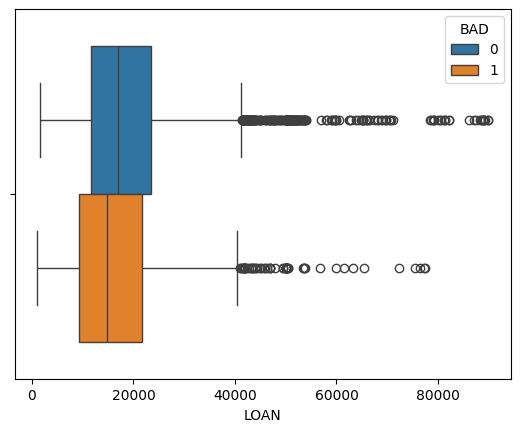

<Figure size 1000x600 with 0 Axes>

In [ ]:
sns.boxplot(x = 'LOAN', hue = 'BAD', data=data)
plt.figure(figsize = (10, 6))
plt.show()

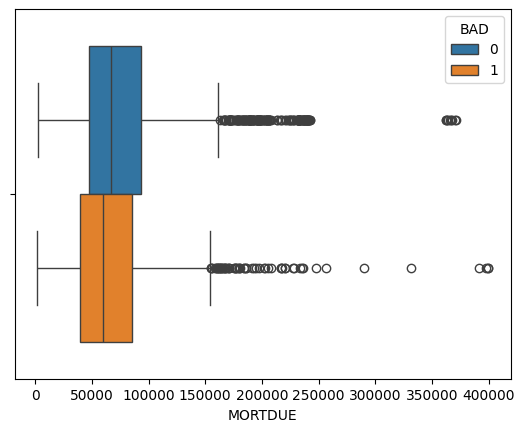

<Figure size 1000x600 with 0 Axes>

In [ ]:
sns.boxplot(x = 'MORTDUE', hue = 'BAD', data=data)
plt.figure(figsize = (10, 6))
plt.show()

**Observations:**
- Those who defaulted (Class 1) do not have a significantly lower loan amount compared to those who repaied their loan. The average loan variance is $2.1K. Therefore, loan requested is not a strong indicator of how likely someone is to default.

- Similarily to the loan amount, mortgage due is not significantly different from those who default vs repay their loan.
- In both cases, on average there is a $5K difference between class 0 and class 1

### **Multivariate Analysis**

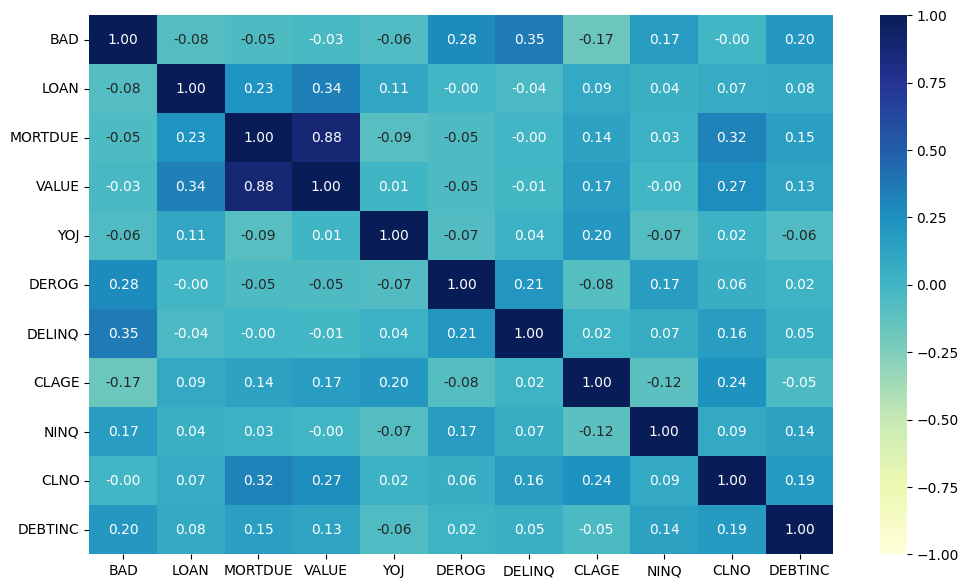

In [ ]:
num_cols = data.select_dtypes(include=np.number).columns.tolist() #create a list of columns with numerical data types

#plot a heatmap correlation of the numerical variables
plt.figure(figsize = (12,7))
sns.heatmap(data[num_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="YlGnBu")
plt.show()

**Observations**


*   **VALUE and MORTDUE** are highly correlated to one another with 88% correlation due to the fact that amount due is depenedent on the value of a property
*   Number of delinquent credit lines or late payments **DELINQ and DEROG** and the Default variable **BAD** have high correlation: 28-35%.
*   **CLAGE** Age of oldest credit line  has a negative correlation to **BAD**: -17%
*   **VALUE** of a property and the amount of **LOAN** approved is correlated
*   **CLNO** number of exisiting credit lines is correlated to **MORTDUE** by 32%
* There's a slight positive correlation between **DELINQ** and **CLNO**



In [ ]:
data.shape

(5960, 13)

## Treating Outliers

In [ ]:
# Calculate Q1, Q3, and IQR
Q1 = data[num_cols].quantile(0.25)
Q3 = data[num_cols].quantile(0.75)
IQR = Q3 - Q1

# Define outlier thresholds
lower_threshold = Q1 - 1.5 * IQR
upper_threshold = Q3 + 1.5 * IQR

# Check for outliers
outliers = data[(data[num_cols] < lower_threshold) | (data[num_cols] > upper_threshold)].sum()

if outliers.empty:
    print("No outliers found.")
else:
    print("Outliers found:")
    print(outliers)

Outliers found:
BAD           1189.00000
LOAN      13963800.00000
MORTDUE   49221289.00000
VALUE     83078932.00000
REASON                 0
JOB                    0
YOJ           2815.40000
DEROG         1337.00000
DELINQ        2418.00000
CLAGE        25482.22642
NINQ          1390.00000
CLNO         10818.00000
DEBTINC       3188.94453
dtype: object


In [ ]:
df_raw = data.copy() #make a copy of data before treating outliers

numerical_col = df_raw.select_dtypes(include=np.number).columns.tolist()# getting list of numerical columns

df = treat_outliers_all(df_raw, numerical_col)

In [ ]:
#define function to treat outliers
def treat_outliers(df,col):
    '''
    treats outliers in a varaible
    col: str, name of the numerical varaible
    df: data frame
    col: name of the column
    '''
    Lower_Whisker = Q1 - 1.5* IQR
    Upper_Whisker =Q3 + 1.5 * IQR # define upper Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker) # all the values above upper_whishker will be assigned value of upper_Whisker

    return df

def treat_outliers_all(df, col_list):
    '''
    treat outlier in all numerical varaibles
    col_list: list of numerical varaibles
    df: data frame
    '''
    for c in col_list:
        df = treat_outliers(df,c)

    return df


In [ ]:
df.shape

## Treating Missing Values

Method: Will treat missing values but also create a column that flags that there are missing values, for the model to be able to consider this during approval process.

In [ ]:
#create new column that flags missing values under DEBTINC ratio, which is an important factor to consider
missing_flag = data['DEBTINC'].isna()
missing_flag = missing_flag.astype(int)
data['missing_flag'] = missing_flag
data.shape

(5960, 14)

In [ ]:
#replace missing numerical values with median
num_data = data.select_dtypes('number')
data[num_data.columns] = num_data.fillna(num_data.median())
data[num_data.columns].describe().T

,count,mean,std,min,25%,50%,75%,max
BAD,5960.00000,0.19950,0.39966,0.00000,0.00000,0.00000,0.00000,1.00000
LOAN,5960.00000,18607.96980,11207.48042,1100.00000,11100.00000,16300.00000,23300.00000,89900.00000
MORTDUE,5960.00000,73001.04181,42552.72678,2063.00000,48139.00000,65019.00000,88200.25000,399550.00000
VALUE,5960.00000,101540.38742,56869.43668,8000.00000,66489.50000,89235.50000,119004.75000,855909.00000
YOJ,5960.00000,8.75617,7.25942,0.00000,3.00000,7.00000,12.00000,41.00000
DEROG,5960.00000,0.22433,0.79846,0.00000,0.00000,0.00000,0.00000,10.00000
DELINQ,5960.00000,0.40570,1.07926,0.00000,0.00000,0.00000,0.00000,15.00000
CLAGE,5960.00000,179.44072,83.57470,0.00000,117.37143,173.46667,227.14306,1168.23356
NINQ,5960.00000,1.17013,1.65387,0.00000,0.00000,1.00000,2.00000,17.00000
CLNO,5960.00000,21.24782,9.95131,0.00000,15.00000,20.00000,26.00000,71.00000


In [ ]:
#Fill missing values for categorical variables with most frequent value (mode)
for column in category:
    mode = data[column].mode([0])
    data[column].fillna(mode, inplace=True)
data[column].isnull().sum()

279

**Observations:**
* Due to the skewed nature of the numerical variables, we must replace the missing values with the **median, which is robust to outliers**. However, I also made sure to add a new column that represents the fact that there are missing values. This will be important for the model to take into consideration when approving.
* For the categorical variables, **mode** will be used to replace the missing values.

## **Important Insights from EDA**

What are the the most important observations and insights from the data based on the EDA performed?

**Observations**
* Overall, the data has many missing values and a wide range of outliers in each column. Therefore, it was necessary to treat the noise in order to proceed with building the model efficiently.

* We see a strong correlation between DELINQ, DEROG to our target variable BAD, which signifies that an applicant with high number of delinquent credit lines will most likely default.

* REASON and JOB do not play a significant role in the proportion of those who defaulted vs not

* The loan rate and mortgage amount does does differ largerly between defaulters and non defaulters.



## **Model Building - Approach**
- Data preparation
- Partition the data into train and test set
- Build the model
- Fit on the train data
- Tune the model
- Test the model on test set

## **Data Preparation**

In [ ]:
#Create X independent variable separate from Y dependent by dropping Y target outcome
x = data.drop(['BAD'], axis =1)
#Create Y target variable
y = data.BAD

In [ ]:

#Create dummy variables for the categorical variables to encode for building the model
to_get_dummies_for = ['JOB', 'REASON']

#for column in to_get_dummies_for:
  #data[column] = data[column].astype('category')
x = pd.get_dummies(data=x, columns = to_get_dummies_for, drop_first = True)



### Split the Data

In [ ]:
# Splitting the data to train and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 7, stratify = y)

In [ ]:
#Printing the % sub categories in each class of training and testing data
print("Shape of Training set : ", x_test.shape)
print("Shape of test set : ", x_train.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (1788, 17)
Shape of test set :  (4172, 17)
Percentage of classes in training set:
0   0.80058
1   0.19942
Name: BAD, dtype: float64
Percentage of classes in test set:
0   0.80034
1   0.19966
Name: BAD, dtype: float64


### Model evaluation criterion

1. Prediciting an applicant will default when they do not (False Positive)
2. **Prediciting an applicant will not default when they actually do (False Negative)**

Option #2 is more of a risk, meaning defaults have been misclassified and therefore causing major financial losses for the bank. In this case, it would be most important to **maximize Recall**. The higher the Recall, the less likely the bank will falsely predict defaulters (minimize false negatives). However, Precision is also a relevant metric here as we want to maximize revenue with potential custoemrs. So ultimately, evaluating the F1 Score would also help build the best model.


BAD: 1 = Client defaulted on loan, 0 = loan repaid

In [ ]:
# Creating metric function
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize = (8,6))

    sns.heatmap(cm, annot = True, fmt = '.2f', xticklabels = ['Will Not Default', 'Default'], yticklabels = ['Will Not Default', 'Default'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')

    plt.show()

In [ ]:
def model_performance_classification(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance
    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # Predicting using the independent variables
    pred = model.predict(predictors)

    recall = recall_score(target, pred,average = 'macro')                 # To compute recall

    precision = precision_score(target, pred, average = 'macro')              # To compute precision

    acc = accuracy_score(target, pred)                                 # To compute accuracy score


    # Creating a dataframe of metrics

    df_perf = pd.DataFrame(
        {
            "Precision":  precision,
            "Recall":  recall,
            "Accuracy": acc,
        },

        index = [0],
    )
    return df_perf

**Observations:** A logistic regression model is not appropriate for this data as the recall rate is only 10%.

### Decision Tree

In [ ]:
# Initiate DT classifier
dt = DecisionTreeClassifier(random_state = 2)

In [ ]:
# Fitting decision tree model
dt.fit(x_train, y_train)

DecisionTreeClassifier(random_state=2)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3340
           1       1.00      1.00      1.00       832

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



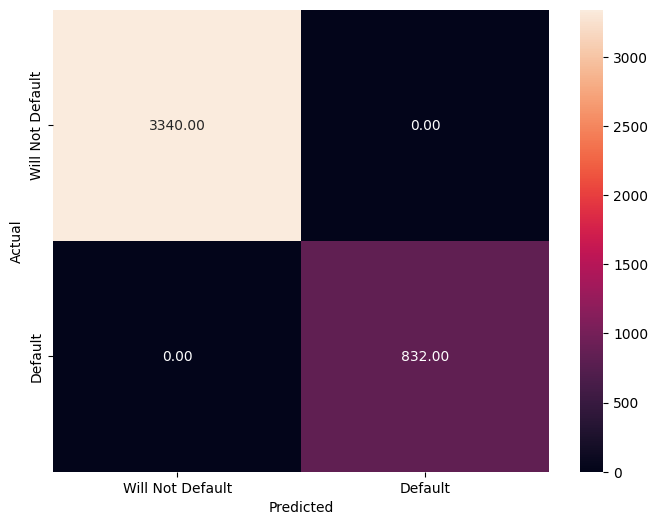

In [ ]:
# Checking performance on the training dataset
y_train_pred_dt = dt.predict(x_train)

metrics_score(y_train, y_train_pred_dt)

The decision tree is giving 100% score for all metrics on training set which means its overfitting

              precision    recall  f1-score   support

           0       0.91      0.93      0.92      1431
           1       0.69      0.61      0.65       357

    accuracy                           0.87      1788
   macro avg       0.80      0.77      0.78      1788
weighted avg       0.86      0.87      0.87      1788



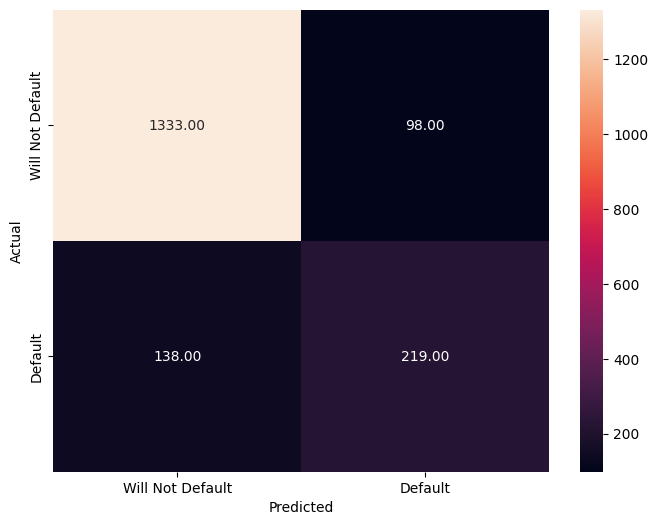

In [ ]:
# Checking performance on the test dataset
y_test_pred_dt = dt.predict(x_test)

metrics_score(y_test, y_test_pred_dt)

In [ ]:
dtree_test = model_performance_classification(dt,x_test,y_test)
dtree_test

,Precision,Recall,Accuracy
0,0.79852,0.77248,0.86801


**Observations:** The test data returned a lower score on all metrics, meaning we have an overfit model. However, 64% recall rate is high to begin with.

### **Decision Tree - Hyperparameter Tuning**

* Hyperparameter tuning is tricky in the sense that **there is no direct way to calculate how a change in the hyperparameter value will reduce the loss of your model**, so we usually resort to experimentation. We'll use Grid search to perform hyperparameter tuning.
* **Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.**
* **It is an exhaustive search** that is performed on the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are **optimized by cross-validated grid-search** over a parameter grid.

**Criterion {“gini”, “entropy”}**

The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

**max_depth**

The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

**min_samples_leaf**

The minimum number of samples is required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.

You can learn about more Hyperpapameters on this link and try to tune them.

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html


We will tune the DT model by adding class weights. The ratio will be the opposite of the imbalanced dataset, in order to put more weight on Class 1 which is the minority. Class 0: 0.20, Class 1: 0.80

In [ ]:
# Choose DT classifier and add class weights to tune
dtree_tuned = DecisionTreeClassifier(class_weight = {0: 0.2, 1: 0.80}, random_state = 2)

# Grid of parameters to choose from & their range of vales as threshold
parameters = {'max_depth': np.arange(2, 10),
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 35]
             }

# Run the grid search
#pass in estimator (decision tree classifier)
#paramters are dictionary of all paramters you want to tune, and arange of values,
#criteria of grid search = scorer, cv = 5 or 10 folds - cross validation

gridCV = GridSearchCV(dtree_tuned, parameters, cv = 5)

# Fitting the grid search on the train data
gridCV = gridCV.fit(x_train, y_train)

# Set the classifier to the best combination of parameters
dtree_tuned = gridCV.best_estimator_

# Fit the best estimator to the data
dtree_tuned.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, criterion='entropy',
                       max_depth=5, min_samples_leaf=5, random_state=2)

              precision    recall  f1-score   support

           0       0.94      0.92      0.93      3340
           1       0.71      0.75      0.73       832

    accuracy                           0.89      4172
   macro avg       0.82      0.84      0.83      4172
weighted avg       0.89      0.89      0.89      4172



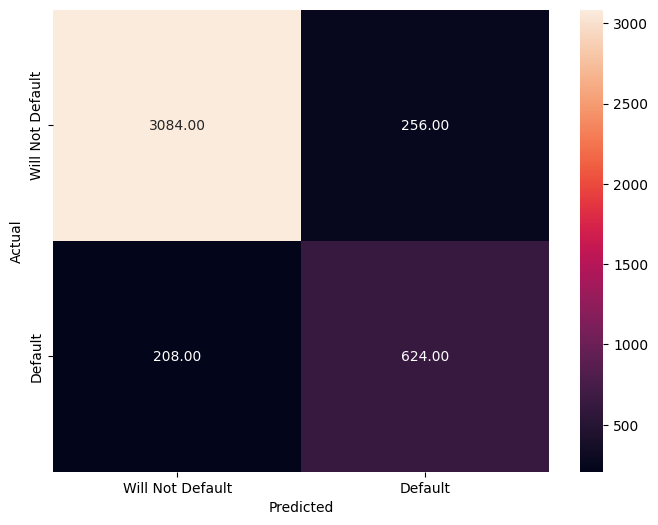

In [ ]:
# Checking performance on the training dataset
y_train_pred_dt = dtree_tuned.predict(x_train)

metrics_score(y_train, y_train_pred_dt)


              precision    recall  f1-score   support

           0       0.93      0.90      0.91      1431
           1       0.65      0.71      0.68       357

    accuracy                           0.87      1788
   macro avg       0.79      0.81      0.80      1788
weighted avg       0.87      0.87      0.87      1788



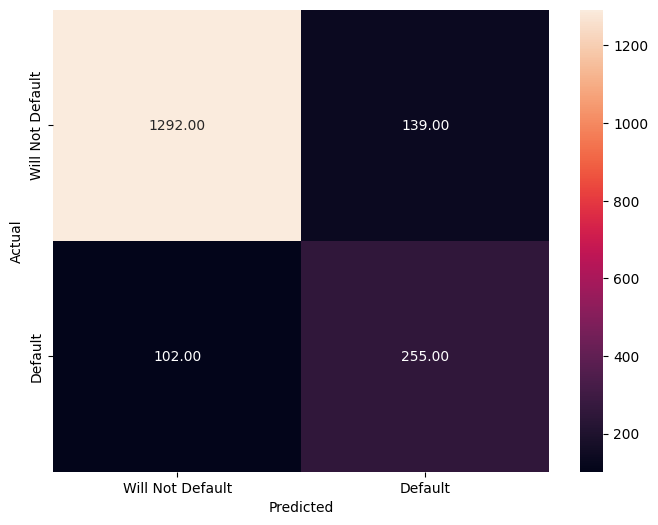

In [ ]:
# Checking performance on the test dataset
y_test_pred_dt = dtree_tuned.predict(x_test)

metrics_score(y_test, y_test_pred_dt)

**Observations:**  In the hypertuned decision tree, our model returned a lower recall score on the test data (74% vs 81% on the train). Precision rate also reduced slightly. This is an underfitted model.

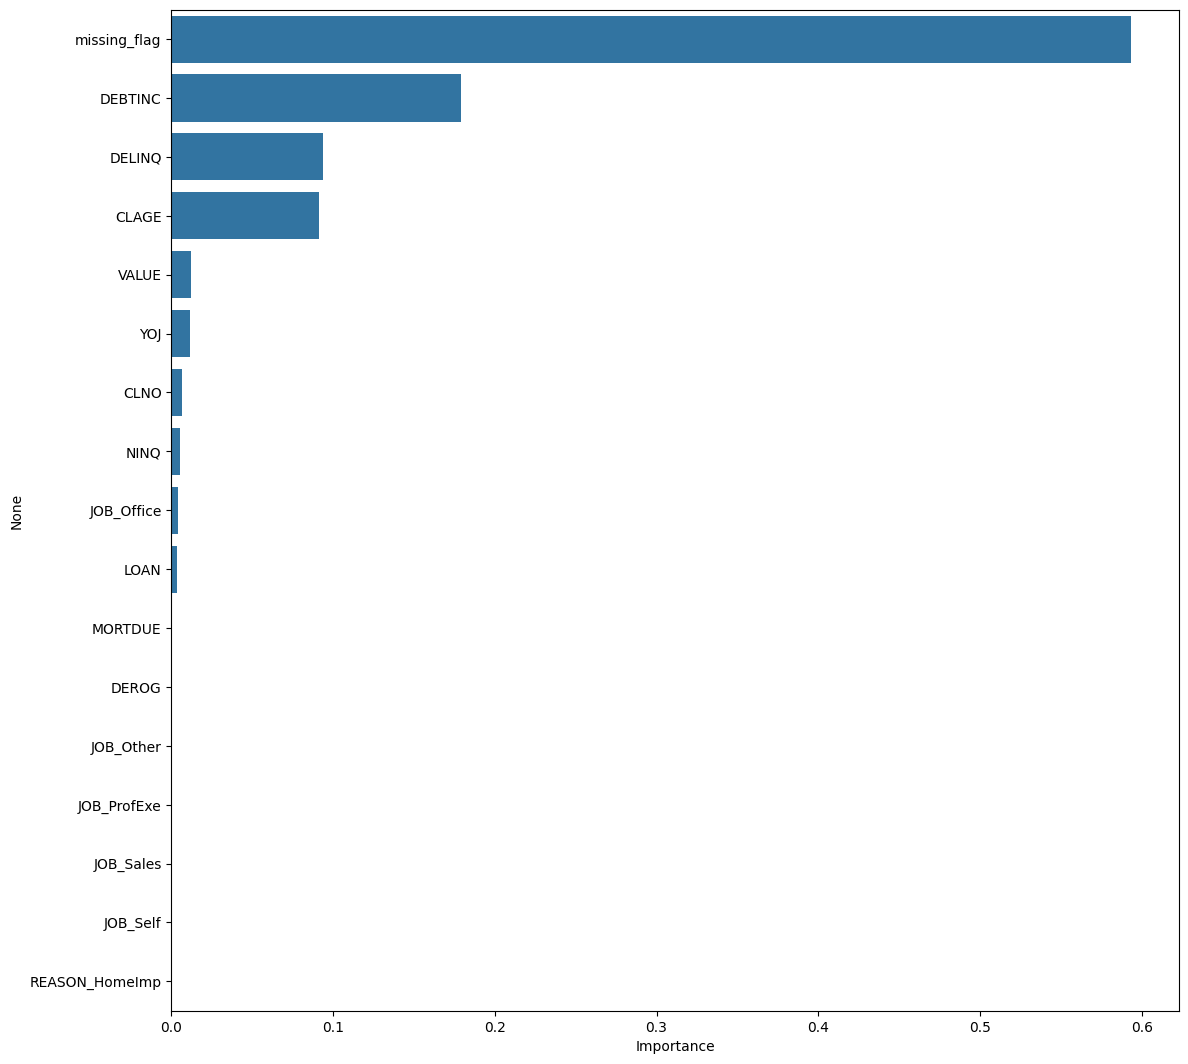

In [ ]:
importances = dtree_tuned.feature_importances_

columns = x.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(x= importance_df.Importance, y= importance_df.index);


**Observations**:


*   According to the Importance Feature graph, DEBTINC is the most important feature when determining if someone will default or not
*   CLAGE AND DELINQ also play a role in determining if they will get approved for a loan or not




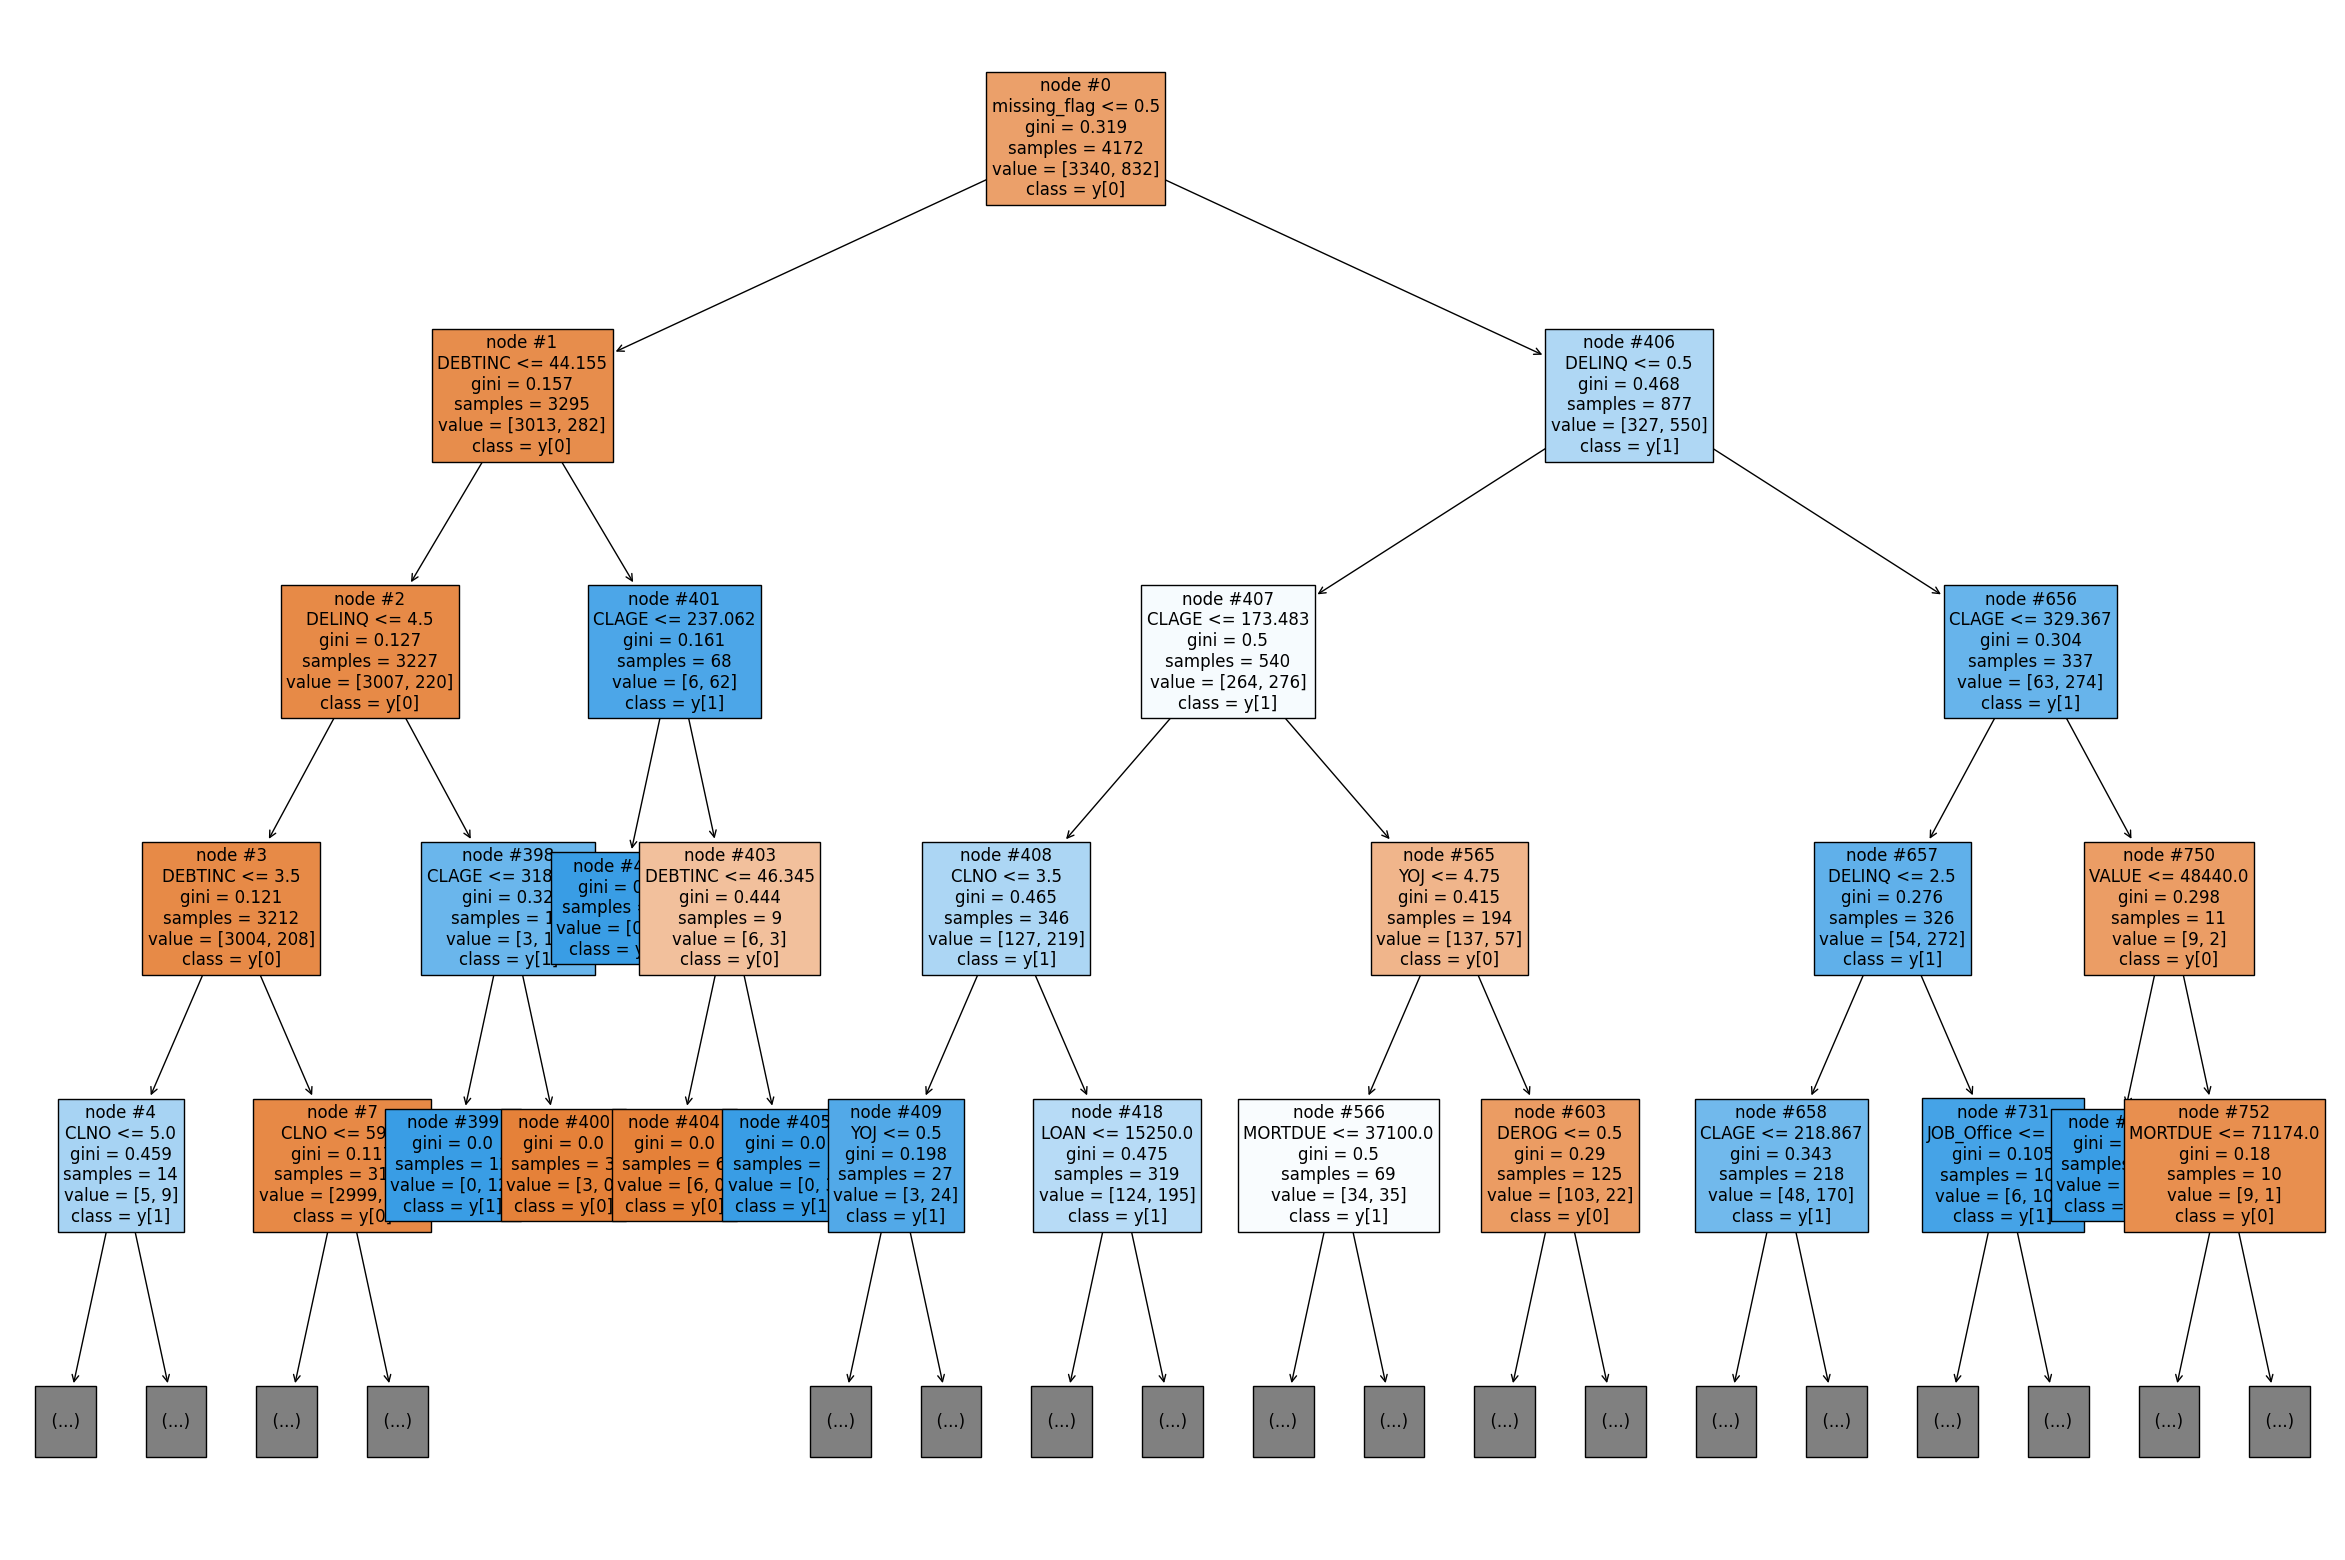

In [ ]:
#Flot the first Decision Tree - Hypertuned
features = list(x.columns)

plt.figure(figsize = (30, 20))

tree.plot_tree(dt, max_depth = 4, feature_names = features, filled = True, fontsize = 12, node_ids = True, class_names = True)

plt.show()

**Observations:**


*   Applicants with high DEBTINC are likely to default
*  Applicants with aged credit lines CLAGE are likely to not default
*   LOAN and NINQ also seem to be important factors as it shows up a few times in the tree



### **Building a Random Forest Classifier**

**Random Forest is a bagging algorithm where the base models are Decision Trees.** Samples are taken from the training data and on each sample a decision tree makes a prediction.

**The results from all the decision trees are combined together and the final prediction is made using voting or averaging.**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Fitting the Random Forest classifier on the training data
rf_estimator = RandomForestClassifier(class_weight = {0: 0.20, 1: 0.80}, random_state = 2)

rf_estimator.fit(x_train, y_train)

RandomForestClassifier(class_weight={0: 0.2, 1: 0.8}, random_state=2)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3340
           1       1.00      1.00      1.00       832

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



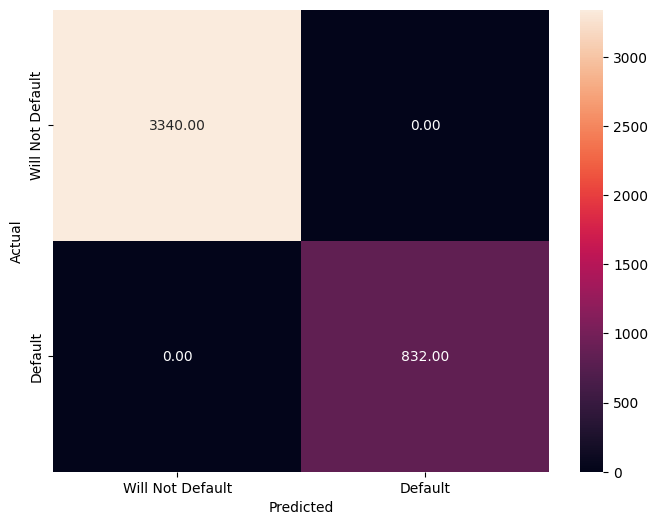

In [ ]:
# Checking performance on the training data
y_pred_train_rf = rf_estimator.predict(x_train)

metrics_score(y_train, y_pred_train_rf)

              precision    recall  f1-score   support

           0       0.91      0.96      0.93      1431
           1       0.79      0.64      0.70       357

    accuracy                           0.89      1788
   macro avg       0.85      0.80      0.82      1788
weighted avg       0.89      0.89      0.89      1788



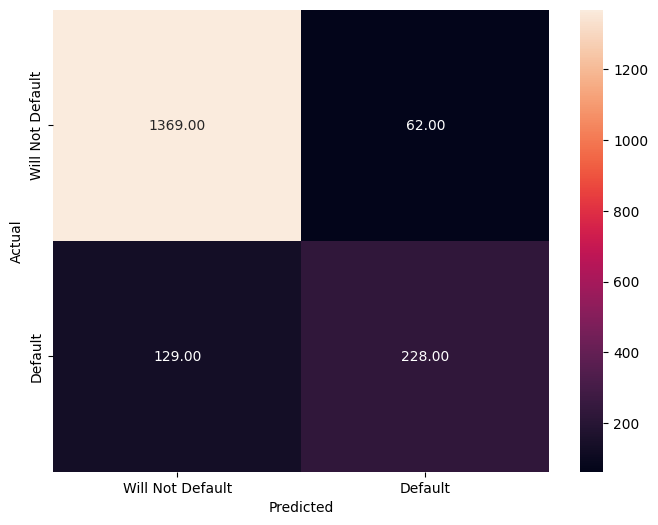

In [ ]:
# Checking performance on the testing data
y_pred_test_rf = rf_estimator.predict(x_test)

metrics_score(y_test, y_pred_test_rf)

In [ ]:
rf_estimator_test = model_performance_classification(rf_estimator,x_test,y_test)
rf_estimator_test

,Precision,Recall,Accuracy
0,0.85005,0.79766,0.89318


**Observations:** The Random Forest model brought back another overfit model, however, the recall and precision rate has increased from the Decision Tree. The Accuracy rate has also improved.

In [ ]:
import tensorflow as tf
import keras

tf.keras.backend.clear_session()

### **Random Forest Classifier Hyperparameter Tuning**

In [ ]:
# Choose the type of classifier
rf_estimator_tuned = RandomForestClassifier(class_weight = {0: 0.20, 1: 0.80}, random_state = 2)

In [ ]:
# Grid of parameters to choose from - can include more or define diff set on numbers
params_rf = {
        "n_estimators": [100, 250, 400],
        "min_samples_leaf":np.arange(1, 4, 1),
        "max_features": [0.7, 0.9, 'auto'],
}

In [ ]:
# Set the classifier to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

In [ ]:
rf_estimator_tuned.fit(x_train, y_train)

RandomForestClassifier(class_weight={0: 0.2, 1: 0.8}, random_state=2)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3340
           1       1.00      1.00      1.00       832

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



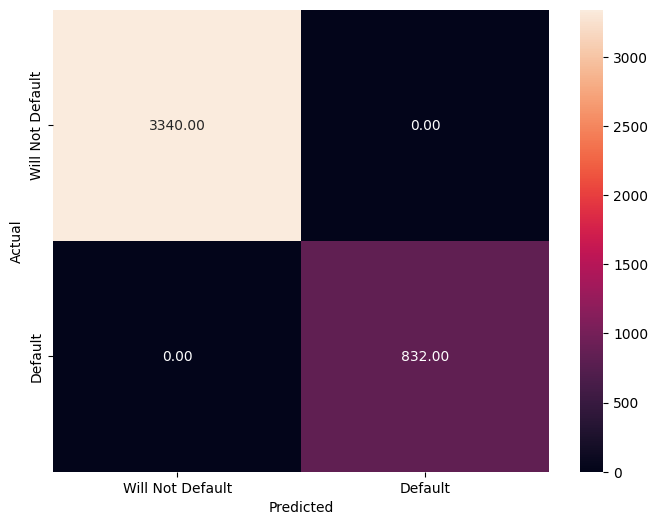

In [ ]:
# Checking performance on the training data
y_pred_train_rf_tuned = rf_estimator_tuned.predict(x_train)

metrics_score(y_train, y_pred_train_rf_tuned)

              precision    recall  f1-score   support

           0       0.91      0.96      0.93      1431
           1       0.79      0.64      0.70       357

    accuracy                           0.89      1788
   macro avg       0.85      0.80      0.82      1788
weighted avg       0.89      0.89      0.89      1788



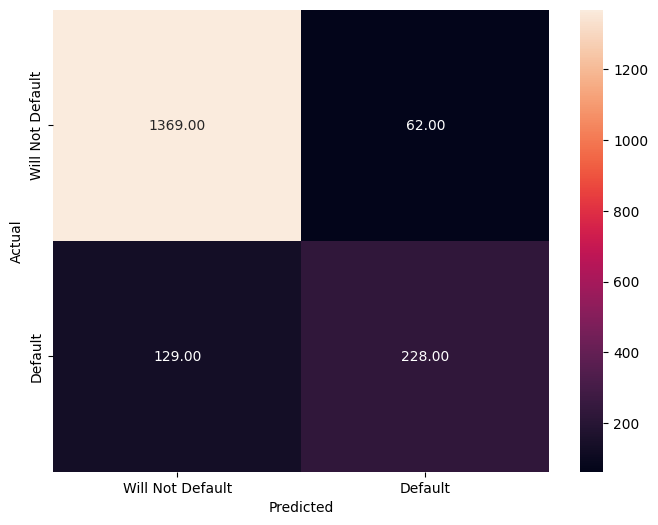

In [ ]:
# Checking performance on the test data - best results, less gap between train/test
y_pred_test_rf_tuned = rf_estimator_tuned.predict(x_test)

metrics_score(y_test, y_pred_test_rf_tuned)

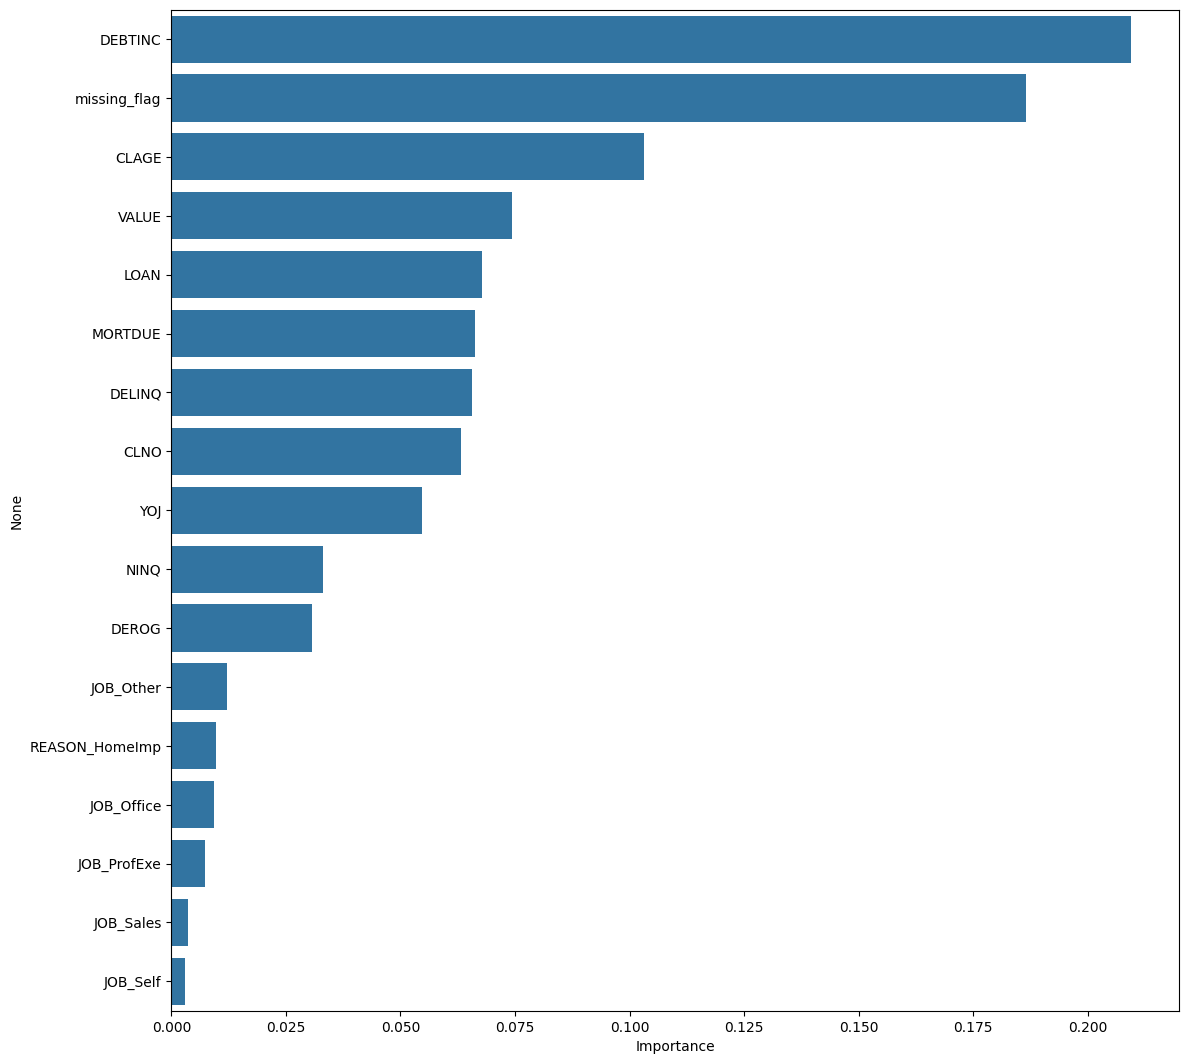

In [ ]:
importances = rf_estimator.feature_importances_ #now you have multiple trees, take average

columns = x.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(x= importance_df.Importance, y=importance_df.index);

**Final conclusions**
- DEBTINC and CLAGE are key indicators of default.
- Applicants who do not enter key information are also flagged and is taken into consideration in approval process
- Value, Loan, and Mortgage amounts are taken into consideration.
- DELINQ also plays a role in predicting default

**1. Comparison of various techniques and their relative performance based on chosen Metric (Measure of success):**
- The Model that performed best was the Decision Tree with 75% recall rate and 79% precision.
- The tuned Random Forest also performed with Precision at 91%, however this model isnt as interpretable.

**2. Refined insights:**
- Random Forest model has computational cost of time - executing GridSearch

**3. Proposal for the final solution design:**
- The Tuned Decision Tree is the most impactful model to use with **75% recall rate**. Decision Trees are the most interpretable models, making it good enough for production and interpretability for easy adoption by any bank.